In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd 
import numpy as np 
import keras
import tflearn.data_utils as du
from keras.optimizers import RMSprop
import os
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

x_train = pd.read_csv("/content/drive/Shared drives/CSE 140 Project/csvFiles/csvTrainImages 13440x1024.csv")
x_test = pd.read_csv("/content/drive/Shared drives/CSE 140 Project/csvFiles/csvTestImages 3360x1024.csv")

y_train = pd.read_csv("/content/drive/Shared drives/CSE 140 Project/csvFiles/csvTrainLabel 13440x1.csv")
y_test = pd.read_csv("/content/drive/Shared drives/CSE 140 Project/csvFiles/csvTestLabel 3360x1.csv")

x_train = x_train.iloc[:,:].values
y_train = y_train.iloc[:,:].values
x_test = x_test.iloc[:,:].values
y_test = y_test.iloc[:,:].values

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
max_ = y_train.max()+1

(x_train, x_validation) = x_train[1000:], x_train[:1000]
(y_train, y_validation) = y_train[1000:], y_train[:1000]

num_labels = len(np.unique(y_train))+1
y_train = keras.utils.to_categorical(y_train, num_labels)
y_test = keras.utils.to_categorical(y_test, num_labels)
y_validation = keras.utils.to_categorical(y_validation, num_labels)

x_train = x_train.reshape([-1, 32, 32, 1])
x_test = x_test.reshape([-1, 32, 32, 1])
x_validation = x_validation.reshape([-1, 32, 32, 1])

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(29, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                   metrics=['accuracy'])

imageDataGen_train = ImageDataGenerator(
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip=True)     

imageDataGen_train.fit(x_train)
  
history = model.fit_generator(imageDataGen_train.flow(x_train, y_train, batch_size = 100),
                    steps_per_epoch=x_train.shape[0] // 100,
                    epochs=50, verbose=2,
                    validation_data=(x_validation, y_validation),
                    validation_steps=x_validation.shape[0] // 100)

# model.fit(train_x, train_y,
#           batch_size=10,
#           epochs=10,
#           verbose=1,
#           validation_data=(test_x, test_y)
#          )



Using TensorFlow backend.













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        4160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              41953

In [0]:
# from sklearn.metrics import confusion_matrix
# predictions = model.predict(x_test)
# predictions = np.argmax(predictions,axis = 1)
# cm = confusion_matrix(y_test, predictions)
# accuracy = sum(cm[i][i] for i in range(28)) / y_test.shape[0]
# print("accuracy = " + str(accuracy))

score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1]*100)


 Test accuracy: 93.80768085739804


Text(0.5, 1.0, 'Training and validation loss')

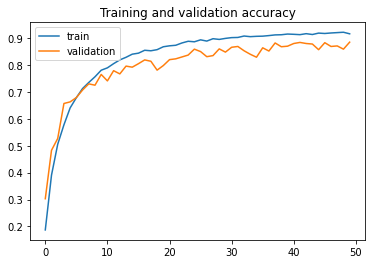

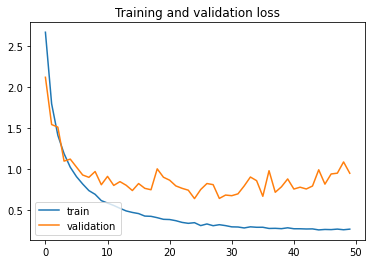

In [0]:
import matplotlib.pyplot as plt
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.legend(['train', 'validation'], loc='upper left')
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['train', 'validation'], loc='lower left')
plt.title('Training and validation loss')